6.5 Machine Learning

This script contains the following:
    
1. Importing libraries and data and renaming columns

2. The elbow technique

3. k-means clustering


In [1]:
# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 

# Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
%matplotlib inline

In [4]:
path = '/Users/bridget/Downloads/Avocado Analysis 2023'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','avocado_new.csv'))

In [6]:
df.shape

(27321, 15)

In [7]:
df.head()

,Unnamed: 0,Unnamed,Date,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,type,year,region
0,0,0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2,2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,3,3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,4,4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [9]:
# Remove column 'Unnamed: 0'

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
# Remove column 'Unnamed'

df.drop('Unnamed', axis = 1, inplace = True)

In [12]:
df

,Date,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico
27317,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico
27318,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico
27319,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico


2. The Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
# Removing all categorical variables

df.drop(['Date', 'type', 'region'], axis = 1, inplace = True)

In [18]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

[-5.278288678951874e+17,
 -9.122964910693555e+16,
 -4.0917030898904184e+16,
 -2.8575815328659132e+16,
 -2.2181322572342732e+16,
 -1.897230708430903e+16,
 -1.5981864065104832e+16,
 -1.4193250929705174e+16,
 -1.296904201925633e+16]

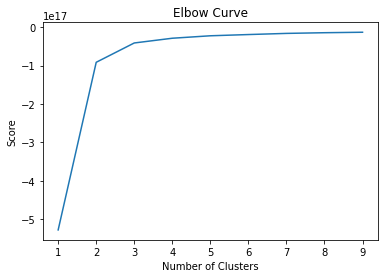

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve, optimal number of clusters is 3 as X-axis begins to flatten out after value of 3

3. k-means clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [23]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

In [27]:
df.head()

,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,year,clusters
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,0
1,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,0
2,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,0
3,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,2015,0
4,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,2015,0


In [28]:
df['clusters'].value_counts()

0    25143
2     1925
1      253
Name: clusters, dtype: int64

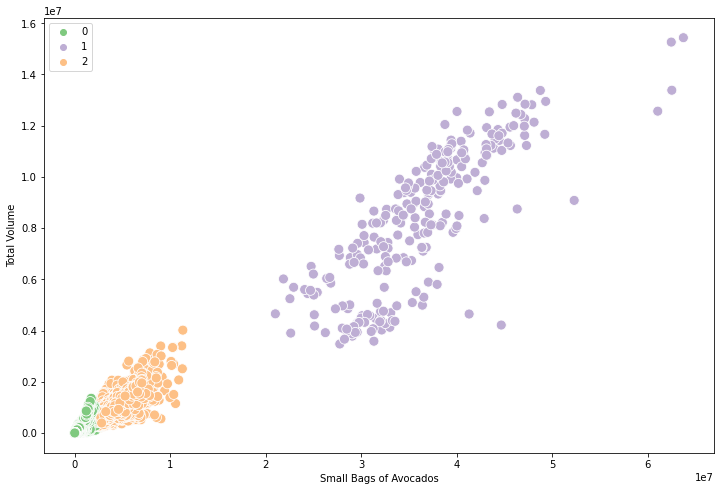

In [58]:
# Plot the clusters for the 'Total Volume' and 'Small Bags' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Volume'], y=df['Small Bags'], hue=kmeans.labels_, palette='Accent', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Small Bags of Avocados') # Label x-axis.
plt.ylabel('Total Volume') # Label y-axis.
plt.show()

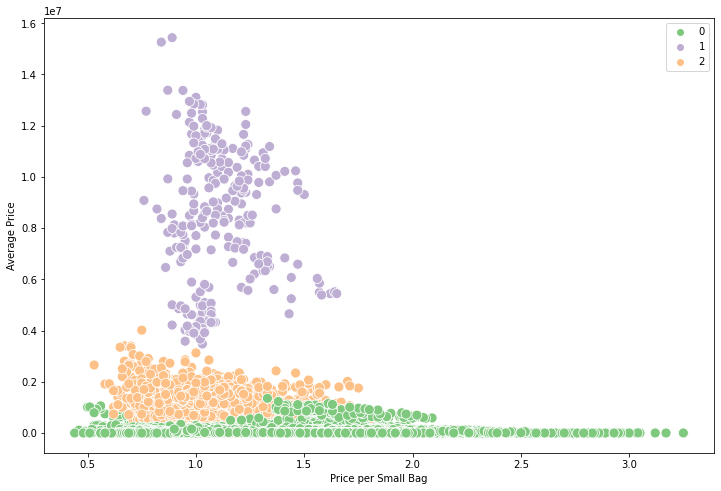

In [61]:
# Plot the clusters for the 'Small Bags' and 'Average Price' variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['AveragePrice'], y = df['Small Bags'], hue = kmeans.labels_, palette = 'Accent', s = 100) 

ax.grid(False)
plt.xlabel('Price per Small Bag')
plt.ylabel('Average Price')
plt.show()

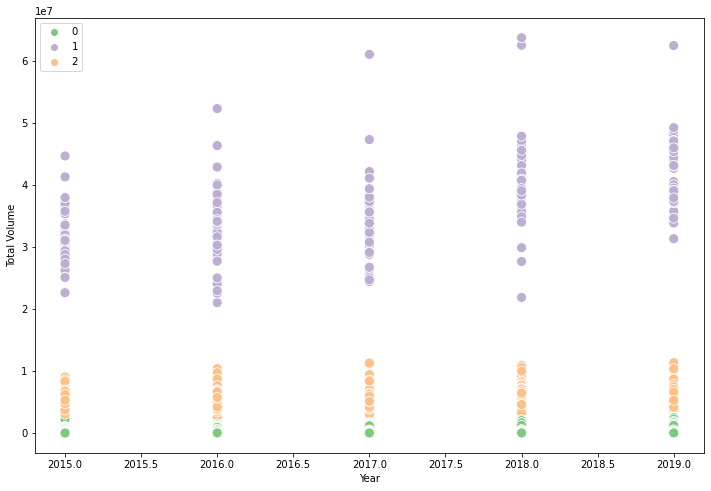

In [65]:
# Plot the clusters for the 'year' and 'Total Volume' variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['year'], y = df['Total Volume'], hue = kmeans.labels_, palette ='Accent', s = 100) 

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

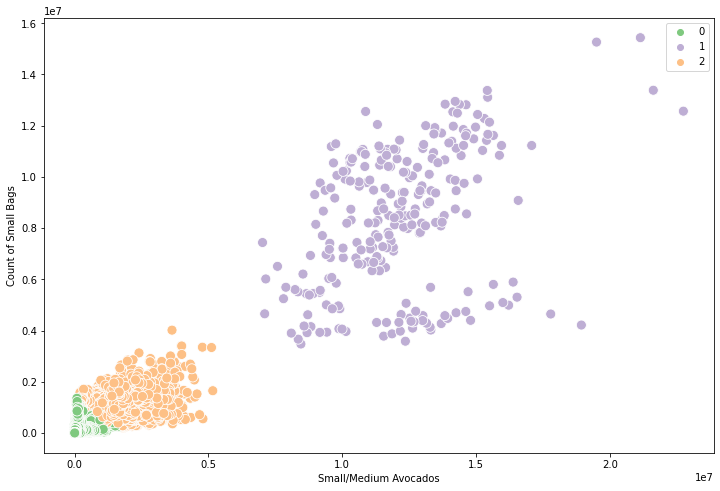

In [69]:
# Plot the clusters for the 'Small/Medium' and 'Count of Small Bags' variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Small/Medium'], y = df['Small Bags'], hue = kmeans.labels_, palette='Accent', s = 100) 

ax.grid(False)
plt.xlabel('Small/Medium Avocados')
plt.ylabel('Count of Small Bags')
plt.show()

4. Observations

Cluster 1 (light purple) has strongest performances in all 4 plot chart analyses 

Total Volume of Small Bags of Avocados show as one value increases, so does the other

Average Price of Small bags of Avocados show only Cluster 2 values after $2.00 per small bag

Small/Medium avocados by count of Small Bags shows strong correlation with Cluster 1 after counts over 1 avocado ranging between 0.5 small bags - 1.2 small bags

5. Descriptive Analysis

In [70]:
df.loc[df['clusters'] == 2, 'cluster'] = 'peach'
df.loc[df['clusters'] == 1, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

In [71]:
df.groupby('cluster').agg({'AveragePrice':['mean', 'median'], 
                         'Total Volume':['mean', 'median'], 
                         'Small Bags':['mean', 'median'],
                          'Small/Medium':['mean', 'median']})

AveragePrice         Total Volume                 Small Bags  \
                     mean median          mean       median          mean   
cluster                                                                     
green            1.426158   1.40  2.635673e+05     90490.56  6.659493e+04   
light purple     1.104704   1.06  3.612934e+07  36169161.57  8.325586e+06   
peach            1.106338   1.09  4.775679e+06   4506892.62  1.140095e+06   

                          Small/Medium               
                  median          mean       median  
cluster                                              
green           24499.24  7.593446e+04      6379.80  
light purple  8492744.45  1.213444e+07  11943914.54  
peach         1105519.80  1.605067e+06   1549012.12